In [1]:

# coding: utf-8

# In[346]:


from array import array
import sys
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import math
import csv
import pandas

In [2]:
class Net(object):
    
    def __init__(self, Parameter_Vector):
        Layer_sizes = (3,3,2,1)
        
        self.W1 = Parameter_Vector[0:9].reshape(3,3)
        self.b1 = Parameter_Vector[9:12].reshape(3,1)
        self.W2 = Parameter_Vector[12:21].reshape(3,3)
        self.b2 = Parameter_Vector[21:24].reshape(3,1)
        self.W3 = Parameter_Vector[24:30].reshape(3,2)
        self.b3 = Parameter_Vector[30:32].reshape(2,1)
        self.W4 = Parameter_Vector[32:34].reshape(2,1)
        self.b4 = Parameter_Vector[34:35]
        
        
def Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector):
    Net_ = Net(Parameter_Vector)
    return Net_

Parameter_Vector = np.random.rand(35)
Net4 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector)


In [3]:
def Run_Through_Nural_Network_for_1D_SHO(Net,X):
    Z1 = np.dot(Net.W1.T,X) + Net.b1
    A1 = 1/(1 + np.exp(-Z1))
    

    Z2 = np.dot(Net.W2.T,A1) + Net.b2
    A2 = 1/(1 + np.exp(-Z2))
    

    Z3 = np.dot(Net.W3.T,A2) + Net.b3
    A3 = 1/(1 + np.exp(-Z3))
    
    A4 = np.dot(Net.W4.T,A3) + Net.b4
    
    return A4


In [4]:
def Square_difference_Cost_Function(Y_predict,Y_true):

    CostFunction = np.sum((Y_predict-Y_true)**2)
    return CostFunction

In [5]:
def Genetic_Algorithm_Optimizer_for_for_1D_SHO(Initial_Parameter_Vector):

    Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    
    

In [6]:
def Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_Nural_Network_for_1D_SHO(Net1,Phase_Space_time_samples) + Run_Through_Nural_Network_for_1D_SHO(Net2,Phase_Space_time_samples)
    
#     print( Phase_Space_time_samples)
#     print( Hamiltonian_Samples)
#     print(np.shape(Hamiltonian_Samples))
#     print(Hamiltonian_Samples[0,1],Hamiltonian_Samples[0,0])
#     print(Hamiltonian_Samples[0,3],Hamiltonian_Samples[0,2])
    
    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    


In [7]:
def Create_predicted_path(Parameter_Vector,First_two_phase_space_samples,T_total):

    # Individuals_Parameter_Vector = np.random.rand(70)
    Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[0:35])
    Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[35:70])

    # Individuals_Parameter_Vector = np.random.rand(70)
    # Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    # Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[35:70])

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    # dq = 0.1 ## this should be q[i] - q[i-1]
    # dp = 0.1 ## this should be p[i] - q[i-1]
    # dt = 0.1 ## this should be t[i] - t[i-1]

    # T_total = 10
    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])

    # dq_predicted, dp_predicted = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_predicted[i] = q_predicted[i-1] + dq_predicted[i-1]
        p_predicted[i] = p_predicted[i-1] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Create_Predictions_for_paths(Net1,Net2,np.array([q_predicted[i],p_predicted[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)

    return q_predicted, p_predicted, dq_predicted, dp_predicted

In [8]:
def Calculate_Loss_Function(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted):
    Loss1 = np.sum((q_true - q_predicted)**2) + np.sum((p_true - p_predicted)**2)

    Scaling_Factor1 = np.mean(np.abs((q_true - q_predicted)/(dq_true - dq_predicted)))
    Scaling_Factor2 = np.mean(np.abs((p_true - p_predicted)/(dp_true - dp_predicted)))

    Loss2 = Scaling_Factor1*np.sum((dq_true - dq_predicted)**2) + Scaling_Factor1*np.sum((dp_true - dp_predicted)**2)

    Loss = Loss1 + Loss2
    return Loss

8.86046654193457


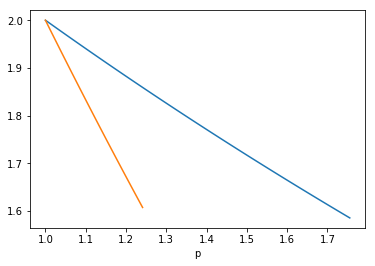

In [9]:
Individuals_Parameter_Vector = np.random.rand(70,20)
T_total = 10
First_two_phase_space_samples = np.array([[1,1.1],[2,1.1],[0,0.1]])


q_predicted, p_predicted, dq_predicted, dp_predicted = Create_predicted_path(Individuals_Parameter_Vector[:,1],First_two_phase_space_samples,T_total)
q_true, p_true, dq_true, dp_true = Create_predicted_path(Individuals_Parameter_Vector[:,2],First_two_phase_space_samples,T_total)

Loss = Calculate_Loss_Function(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.xlabel("q")
plt.xlabel("p")
print(Loss)

In [10]:

class Hamiltonians(object):
    
    def __init__(self):
        m = 1

    def SHO_Hamiltonian(self,Phase_Space_time_samples):
        m = 1
        k = 1
        x = Phase_Space_time_samples[1,:]
        p = Phase_Space_time_samples[2,:]   

        Hamiltonian_Samples = (p**2)/(2*m) + (x**2)*k/2
        
        return         Hamiltonian_Samples 
    
    
def Calculate_Hamiltonian_for_1D_SHO_(Phase_Space_time_samples):
    Hamiltonian_for_1D_SHO_ = Hamiltonian_for_1D_SHO(Phase_Space_time_samples)
    return Hamiltonian_for_1D_SHO_



Phase_Space_time_samples = np.random.rand(4,3)
H = Hamiltonians()
print(H.SHO_Hamiltonian(Phase_Space_time_samples))

[0.08935845 0.41251326 0.33393587]


In [11]:
def Create_true_path(First_two_phase_space_samples,T_total):

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]


    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])



    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_true = np.zeros(NumberOfSamples)
    dp_true = np.zeros(NumberOfSamples)
    q_true = np.zeros(NumberOfSamples)
    p_true = np.zeros(NumberOfSamples)

    ## Initializing
    q_true[0] = Initial_conditions[0]
    p_true[0] = Initial_conditions[1]
    
    H = H = Hamiltonians()
    dq_true[0], dp_true[0] = Create_True_Hamiltonian_paths(H,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_true[i] = q_true[i-1] + dq_true[i-1]
        p_true[i] = p_true[i-1] + dp_true[i-1]
        dq_true[i], dp_true[i] = Create_True_Hamiltonian_paths(H,np.array([q_true[i],p_true[i]]),dt,dq_true[i-1],dp_true[i-1],T_total)

    return q_true, p_true, dq_true, dp_true

In [12]:
def Create_True_Hamiltonian_paths(H,Curent_state,dt,dq,dp,T_total):

    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Curent_state[0] - dq/2,Curent_state[1]])               
    Sample2 = np.array([t[i],Curent_state[0] + dq/2,Curent_state[1]])
    Sample3 = np.array([t[i],Curent_state[0] ,Curent_state[1] - dp/2])               
    Sample4 = np.array([t[i],Curent_state[0] ,Curent_state[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = H.SHO_Hamiltonian(Phase_Space_time_samples)

    dp_true  = -(Hamiltonian_Samples[1] - Hamiltonian_Samples[0])*dt/dq
    dq_true  = (Hamiltonian_Samples[3] - Hamiltonian_Samples[2])*dt/dp
    
    return dq_true, dp_true    
    


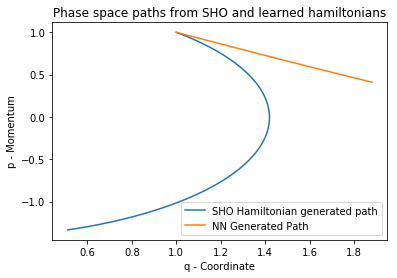

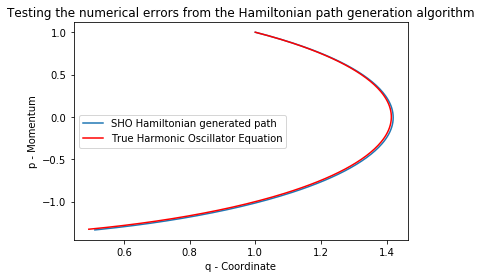

In [13]:
Individuals_Parameter_Vector = np.random.rand(70,20)
T_total = 2

First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
First_two_phase_space_samples = np.array([[1,1.01],[1,0.98984507],[0,0.01]])

q_predicted, p_predicted, dq_predicted, dp_predicted = Create_predicted_path(Individuals_Parameter_Vector[:,1],First_two_phase_space_samples,T_total)
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)



Loss = Calculate_Loss_Function(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted)

plt.figure(1)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])



dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]



Number_Of_Samples = int(T_total / dt)

t = np.linspace(0,T_total,Number_Of_Samples)

w = 1

A = First_two_phase_space_samples[0,0]
B = First_two_phase_space_samples[1,0]/w

q = A*np.cos(w*t) + B*np.sin(w*t)
p = -A*np.sin(w*t) + w*B*np.cos(w*t)
plt.figure(2)
plt.plot(q_true,p_true)
plt.plot(q,p,'r')
plt.title("Testing the numerical errors from the Hamiltonian path generation algorithm")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","True Harmonic Oscillator Equation"])

CurrentCost is: 6583.005377573548

Now Running Itteration 0 \ 10
the ImprovementItteration is: 2


C:\Users\benjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


CurrentCost is: 6080.851946428938

Now Running Itteration 1 \ 10
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 5473.986433048493

Now Running Itteration 2 \ 10
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 5230.5201502809805

Now Running Itteration 3 \ 10
the ImprovementItteration is: 2
CurrentCost is: 1844.3934288348137

Now Running Itteration 4 \ 10
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 1703.085296216333

Now Running Itteration 5 \ 10
the ImprovementItteration is: 2
CurrentCost is: 1703.085296216333

Now Running Itteration 6 \ 10
the ImprovementItteration is: 2
CurrentCost is: 1590.5372158183466

Now Running Itteration 7 \ 10
the ImprovementItteration is: 3
CurrentCost is: 1590.5372158183466

Now Running Itteration 8 \ 10
the ImprovementItteration is: 2
CurrentCost is: 1590.5372158183466

Now Running Itteration 9 \ 10
the ImprovementItteration is: 3


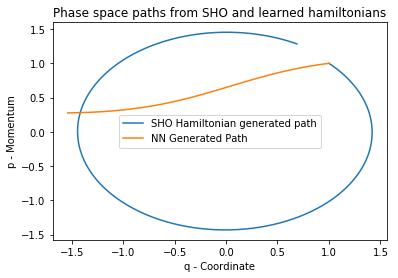

In [16]:
## Two mode optimizer
#function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)
import numpy as np
import matplotlib.pyplot as plt

def Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search):

# function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)


    Vectorized_Implimentation = 0
    For_Loop_Implimentation = 1
    TargetedSearch = np.zeros((len(InitialParameters),NumberOfSamples))
    if sum(abs(Parameter_ChangeVector)) > SignificantChangeValue:
        ImprovementItteration = 1


    
    if Vectorized_Implimentation == 1:
        TargetedSearch = exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)*diag(TargetedMultiplicationFactor*(-Cost_Change)*Parameter_ChangeVector)*ones(length(InitialParameters),NumberOfSamples)*diag(rand(NumberOfSamples,1))
        RandomSearch = exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor*(rand(length(InitialParameters),NumberOfSamples)-0.5)


    if For_Loop_Implimentation == 1:
        RandomNumbers = np.random.rand(NumberOfSamples,1)
        

        TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-Cost_Change)

        for sample in range (1,NumberOfSamples):

            TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

            
            
        if np.max(np.max(TargetedSearch)) > 10: ## This is if the change vector is too bid
            print("Applied supression of change vector")
            TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-1)

            for sample in range (1,NumberOfSamples):

                TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

        RandomSearch = min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search)         *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)
        
    
        if min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search) == Maximal_Random_Search:
            RandomSearch = np.sin((ImprovementItteration-1)*2*RandomSearchGrowthRate + np.pi/2)*0.1             *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)

    Suggested_Parameter_Samples_From_Two_Mode = InitialParameters + TargetedSearch + RandomSearch
    Suggested_Parameter_Samples_From_Two_Mode[:,1] = InitialParameters[:,0]

    ImprovementItteration = ImprovementItteration +1;


    return Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration




def Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations):
    
    Parameter_ChangeVector = np.zeros((len(InitialParameters),1))
    Cost_Change = 0
    
    PreviousCost = Cost1.Cost_Function(InitialParameters)
    Best_Individual = InitialParameters

    for i in range(0,Number_Of_Itterations):
        

        Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration = Two_Mode_Optimizer(Best_Individual,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search)

        Cost    = Cost1.Cost_Function(Suggested_Parameter_Samples_From_Two_Mode)
        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]

        Cost_Change = CurrentCost - PreviousCost
        Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T - Best_Individual
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T

        PreviousCost = CurrentCost
        if print_Cost == 1:
            print("CurrentCost is:",CurrentCost)
            print("")
            print("Now Running Itteration",i,"\\",Number_Of_Itterations)
            print("the ImprovementItteration is:",ImprovementItteration)
    return Best_Individual







## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Individuals_Parameter_Vector): 

        NumberOfSamples = Individuals_Parameter_Vector.shape[1]
        Cost_Function1 = np.zeros(NumberOfSamples)
        for i in range (0,NumberOfSamples):
            q_predicted, p_predicted, dq_predicted, dp_predicted = Create_predicted_path(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,T_total)
            Cost_Function1[i] = Calculate_Loss_Function(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted)


        return Cost_Function1
    

# Individuals_Parameter_Vector = np.random.rand(70,20)




## Setting the hyperparameters for two mode
ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 0.5
RandomMultiplicationFactor =  0.1
SignificantChangeValue = 0.01
Maximal_Random_Search = 0.5
NumberOfSamples = 10 ## This is the number of individuals in each itteration


Number_Of_Itterations = 10
print_Cost = 1


x = 1
y = 1
# First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
First_two_phase_space_samples = np.array([[1,1.01],[1,0.98984507],[0,0.01]])
InitialParameters = np.random.rand(70,1)

T_total = 6
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
Cost1 = Cost_Function()


Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)

T_total = 6
# q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
# InitialParameters = Best_Individual
# Best_Individual = Optimize_With_Two_Mode_Algorithm(x,y,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)


q_predicted, p_predicted, dq_predicted, dp_predicted = Create_predicted_path(Best_Individual,First_two_phase_space_samples,T_total)


plt.figure(3)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])



In [17]:

def Save_to_CSV(Net1_Parameters,Net2_Parameters):
    
        ## Save the parameters of the network
#         Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"

        Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"

        with open(Name_Of_Parameter_File, 'w') as csvfile:
            fieldnames = ['Net1_Parameters','Net2_Parameters']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()

            for i in range(0,Net1_Parameters.shape[0]):
                writer.writerow({ 'Net1_Parameters':Net1_Parameters[i],   'Net2_Parameters':Net2_Parameters[i]})




def Load_Parameters_And_Indexes_Of_Specialist():
#     Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"
    Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"
 
    ## Open Parameter array
    Parameters_Path = r"C:\Users\benjy\OneDrive\Brown\Fall 2018\PHYS 2030 - Classical Physics\Project\Files for the project" 
    Parameters_Path1 = Parameters_Path + "\\" + Name_Of_Parameter_File
    Parameters_temp = pandas.read_csv(Parameters_Path1)
    Parameters_Array = np.array(Parameters_temp)

    
    return Parameters_Array



In [129]:
Number_Of_Nurons_in_5_layer_net = np.array([3,3,3,3,1])
TotalParameters_in_5_layer_net = 2*(Number_Of_Nurons_in_5_layer_net[0]*Number_Of_Nurons_in_5_layer_net[1] + \
Number_Of_Nurons_in_5_layer_net[1]*Number_Of_Nurons_in_5_layer_net[2] + \
Number_Of_Nurons_in_5_layer_net[2]*Number_Of_Nurons_in_5_layer_net[3] +\
Number_Of_Nurons_in_5_layer_net[3]*Number_Of_Nurons_in_5_layer_net[4] + np.sum(Number_Of_Nurons_in_5_layer_net))

print("TotalParameters_in_5_layer_net",TotalParameters_in_5_layer_net)

TotalParameters_in_5_layer_net 86


In [130]:
## Defining the 5 layer complex network


class Net5_(object):
    
    def __init__(self, Parameter_Vector, Number_Of_Nurons_in_5_layer_net):
        
        N_0 = 0
        N1 = Number_Of_Nurons_in_5_layer_net[0]
        N2 = Number_Of_Nurons_in_5_layer_net[1]
        N3 = Number_Of_Nurons_in_5_layer_net[2]
        N4 = Number_Of_Nurons_in_5_layer_net[3]
        N5 = Number_Of_Nurons_in_5_layer_net[4]
        
        ## Reshaping into Weights
        self.W1 = Parameter_Vector[N_0 :N_0 + N1*N2].reshape(N1,N2) + \
                    1j*Parameter_Vector[N_0 + N1*N2:N_0 + 2*N1*N2].reshape(N1,N2)
        N_0 += 2*N1*N2     
        
        self.W2 =Parameter_Vector[N_0:N_0 + N2*N3].reshape(N2,N3) + \
                    1j*Parameter_Vector[N_0+ N2*N3:N_0 + 2*N2*N3].reshape(N2,N3)
        N_0 += 2*N2*N3      
        
        self.W3 =Parameter_Vector[N_0:N_0 + N3*N4].reshape(N3,N4) + \
                    1j*Parameter_Vector[N_0+ N3*N4:N_0 + 2*N3*N4].reshape(N3,N4)
        N_0 += 2*N3*N4      

        self.W4 =Parameter_Vector[N_0:N_0 + N4*N5].reshape(N4,N5) + \
                    1j*Parameter_Vector[N_0+ N4*N5:N_0 + 2*N4*N5].reshape(N4,N5)
        N_0 += 2*N4*N5     
        
        self.W5 =Parameter_Vector[N_0:N_0 + N5*1].reshape(N5,1) + \
                    1j*Parameter_Vector[N_0+ N5*1:N_0 + 2*N5*1].reshape(N5,1)
        N_0 += 2*N5*1          
        
        
        ## Reshaping into biases
        self.b1 = Parameter_Vector[N_0 :N_0 + N2].reshape(N2,1) + 1j*Parameter_Vector[N_0 + N2:N_0 + 2*N2].reshape(N2,1)
        N_0 += 2*N2        
        
        self.b2 =  Parameter_Vector[N_0:N_0 + N3].reshape(N3,1) + 1j* Parameter_Vector[N_0 + N3:N_0 + 2*N3].reshape(N3,1)
        N_0 += 2*N3      
        
        self.b3 =  Parameter_Vector[N_0:N_0 + N4].reshape(N4,1) + 1j* Parameter_Vector[N_0 + N4:N_0 + 2*N4].reshape(N4,1)
        N_0 += 2*N4      
        
        self.b4 =  Parameter_Vector[N_0:N_0 + N5].reshape(N5,1) + 1j* Parameter_Vector[N_0 + N5:N_0 + 2*N5].reshape(N5,1)
        N_0 += 2*N5        
        
        self.b5 = Parameter_Vector[N_0:N_0 + 1].reshape(1,1) + 1j*Parameter_Vector[N_0 + 1:N_0 + 2*1].reshape(1,1)
        N_0 += 2*1    
        
def Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net):
    Net_ = Net5_(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)
    return Net_




Parameter_Vector = np.random.rand(TotalParameters_in_5_layer_net)
Net5 = Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)

print(Net5.W1.shape)

(3, 3)


In [131]:
def Run_Through_5_layer_Net(Net,X):

        Z1 = np.dot(Net.W1.T,X) + Net.b1
        A1 = np.maximum(Z1.real,0) + 0.1*np.minimum(Z1.real,0) + 1j*(np.maximum(Z1.imag,0) + 0.1*np.minimum(Z1.imag,0))


        Z2 = np.dot(Net.W2.T,A1) + Net.b2
        A2 = np.maximum(Z2.real,0) + 0.1*np.minimum(Z2.real,0) + 1j*(np.maximum(Z2.imag,0) + 0.1*np.minimum(Z2.imag,0))
    
        Z3 = np.dot(Net.W3.T,A2) + Net.b3
        A3 = np.maximum(Z3.real,0) + 0.1*np.minimum(Z3.real,0) + 1j*(np.maximum(Z3.imag,0) + 0.1*np.minimum(Z3.imag,0))        
        
        Z4 = np.dot(Net.W4.T,A3) + Net.b4
#         A4 = np.maximum(Z4,0) + 0.1*np.minimum(Z4,0)
        A4 = np.maximum(Z4.real,0) + 0.1*np.minimum(Z4.real,0) + 1j*(np.maximum(Z4.imag,0) + 0.1*np.minimum(Z4.imag,0))
    
    
        Z5 = np.dot(Net.W4.T,A3) + Net.b5
        A5 = (10**(-3))*Z5.real

        return A5

CurrentCost is: 27.297480143107663

Now Running Itteration 0 \ 20
the ImprovementItteration is: 2
CurrentCost is: 26.137760919158556

Now Running Itteration 1 \ 20
the ImprovementItteration is: 3
CurrentCost is: 24.47504460963761

Now Running Itteration 2 \ 20
the ImprovementItteration is: 4
CurrentCost is: 23.039984536518656

Now Running Itteration 3 \ 20
the ImprovementItteration is: 5
CurrentCost is: 21.251535767521396

Now Running Itteration 4 \ 20
the ImprovementItteration is: 6
CurrentCost is: 18.66025719031923

Now Running Itteration 5 \ 20
the ImprovementItteration is: 7
CurrentCost is: 16.975143972715276

Now Running Itteration 6 \ 20
the ImprovementItteration is: 8
CurrentCost is: 16.62361452647685

Now Running Itteration 7 \ 20
the ImprovementItteration is: 9
CurrentCost is: 15.18171896486364

Now Running Itteration 8 \ 20
the ImprovementItteration is: 10
CurrentCost is: 13.607612884627105

Now Running Itteration 9 \ 20
the ImprovementItteration is: 11
CurrentCost is: 12.119

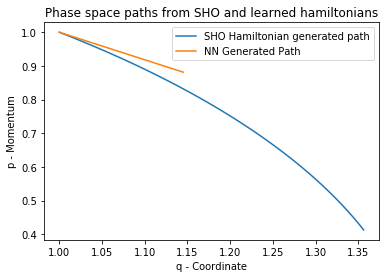

CurrentCost is: 5.425667025485927

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 5.270950531765862

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 4.706552957655263

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 4.414558646035122

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 4.414558646035122

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


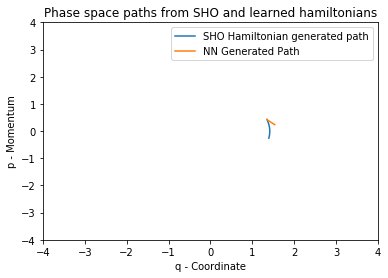

CurrentCost is: 5.986968032986417

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 5.816478186084511

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 5.614739771216092

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 5.32495056303781

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 4.803905749946593

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


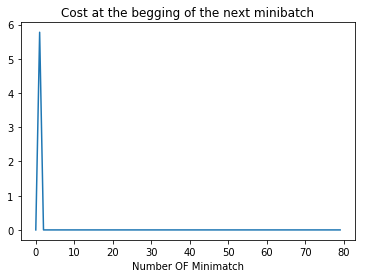

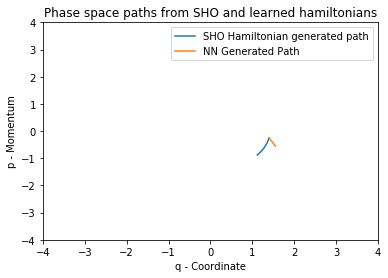

CurrentCost is: 6.322121004170653

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 5.824975902720226

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 5.508257450880227

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 4.89381467473975

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 4.816547739812473

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


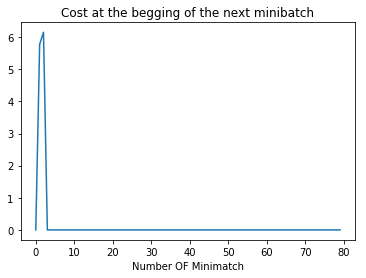

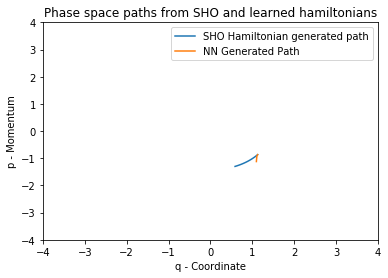

CurrentCost is: 7.6186757274570285

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 7.203120568647415

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 6.842360232429838

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 6.429571645959515

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 6.415737598635487

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


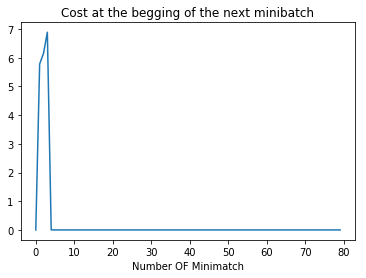

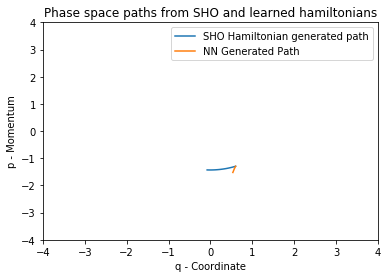

CurrentCost is: 9.271275172760793

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 9.027011570536601

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 8.892519977843296

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 8.579394468453781

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 8.282006854814634

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


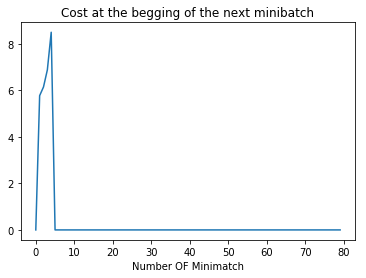

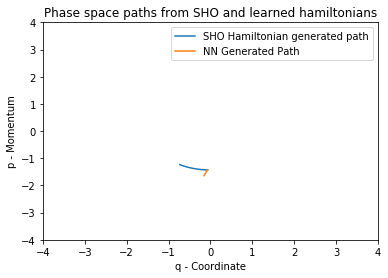

CurrentCost is: 10.52615614567234

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 10.167607384280712

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 9.587801932815456

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 9.307519271878396

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 9.068800721021761

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


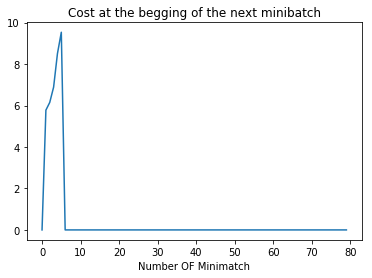

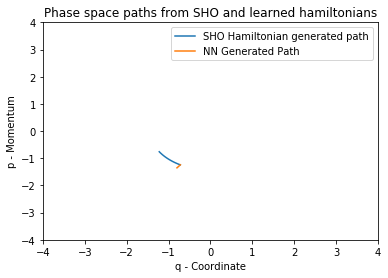

CurrentCost is: 8.271894715875053

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 8.132754969304106

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 7.974323614402206

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 7.974323614402206

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 7.968620074917167

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


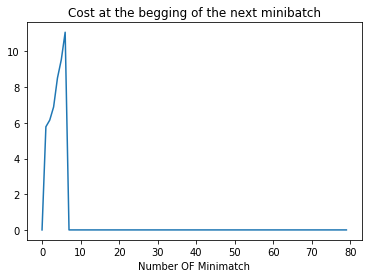

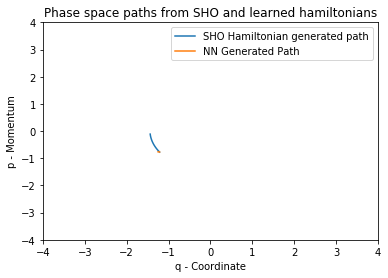

CurrentCost is: 8.317612393714082

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 8.237157838298511

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 8.2073004442683

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 8.022784804736629

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 7.938844301027372

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


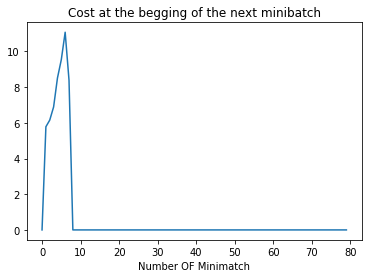

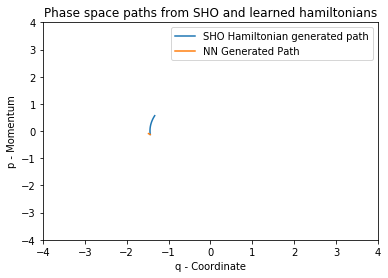

CurrentCost is: 7.626377279240192

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 7.293990323549282

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 7.108076885524502

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 6.827960277424594

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 6.647117011338131

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


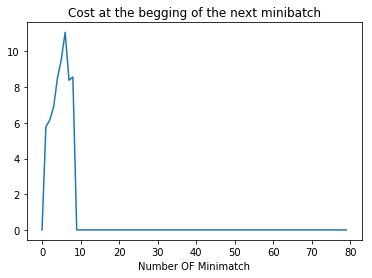

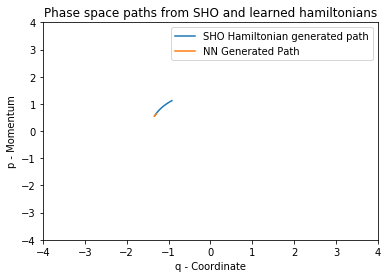

CurrentCost is: 6.840768212521495

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 6.557108384148795

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 5.9723022654632905

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 5.527380861219478

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 5.342984715313244

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


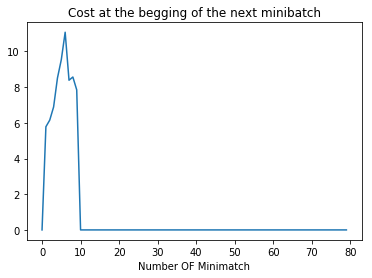

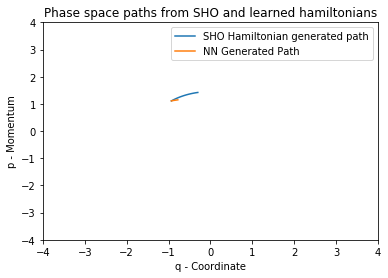

CurrentCost is: 6.5908028138060395

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 6.312423494294651

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 5.854340481690447

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 5.364371897261611

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 5.012524630616987

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


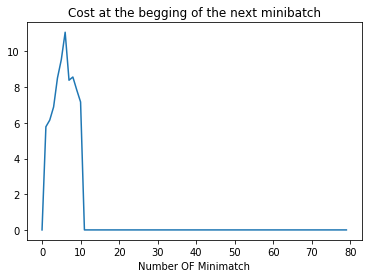

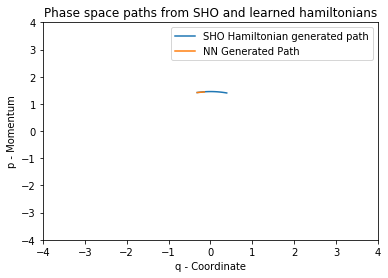

CurrentCost is: 4.847587579414075

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 4.595491613652233

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.618253820505011

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 3.2555244710116185

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.8765748776803077

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


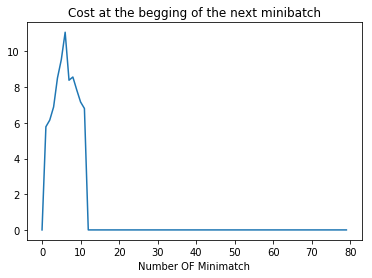

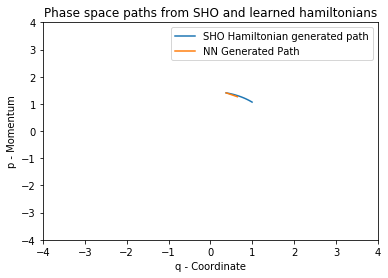

CurrentCost is: 3.3884526626492564

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.936632549062738

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.8928523212110004

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.5115630649787235

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.8699549305554741

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


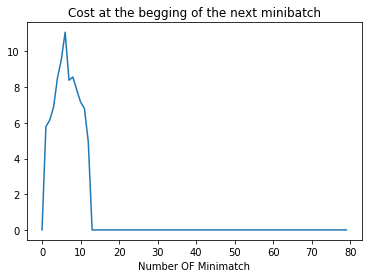

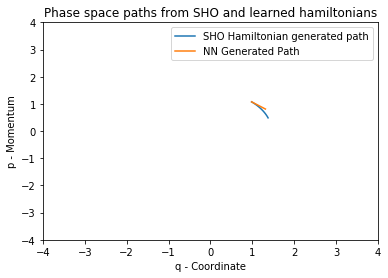

CurrentCost is: 3.8941793856020586

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 3.7113946765774513

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.372894314959641

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.6521298718111352

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.414972807163615

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


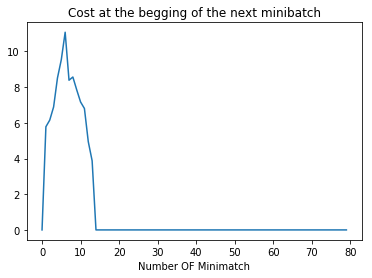

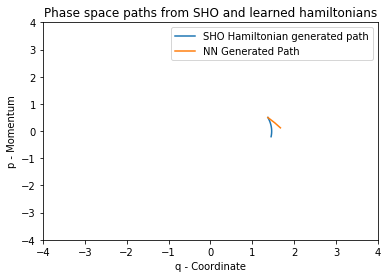

CurrentCost is: 5.049253135735779

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 4.221929500466436

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.455318390974569

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 3.0784981034897725

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.6923020080056603

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


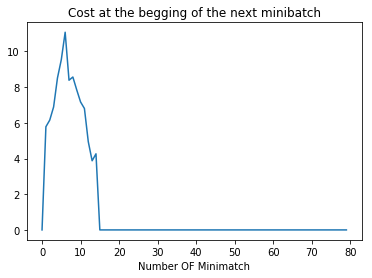

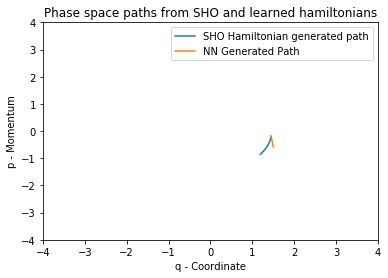

CurrentCost is: 5.105765651605996

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 4.760776047107495

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 4.345734135392486

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 3.9010368421250208

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 3.087259560522555

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


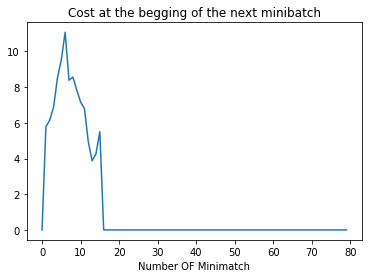

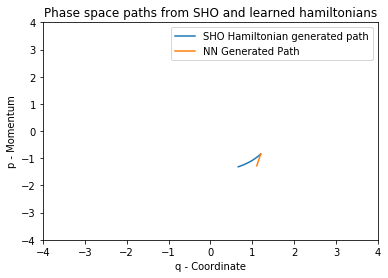

CurrentCost is: 7.429232336664734

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 6.771840961462909

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 6.337640234778927

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 5.109036978778804

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 4.665942233476368

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


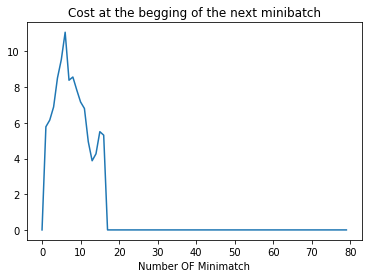

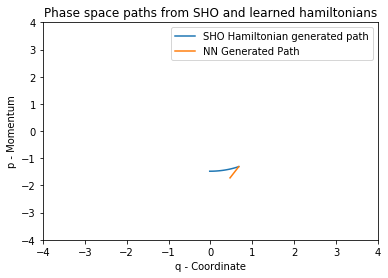

CurrentCost is: 8.064746389302499

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 7.419128621227346

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 6.476906128020549

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 5.910721575056963

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 5.489670162549576

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


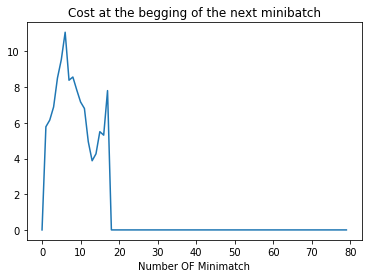

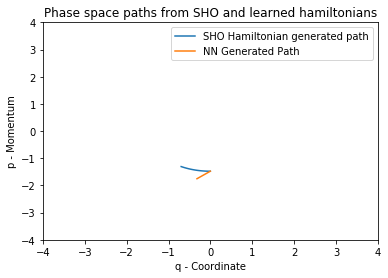

CurrentCost is: 8.441174043906358

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 7.885202234148056

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 7.561531827346674

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 7.100219728931614

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 6.834750067487499

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


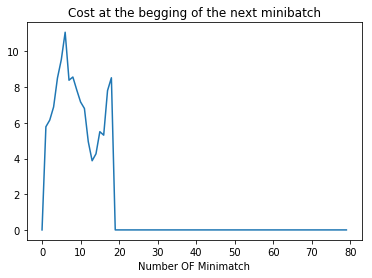

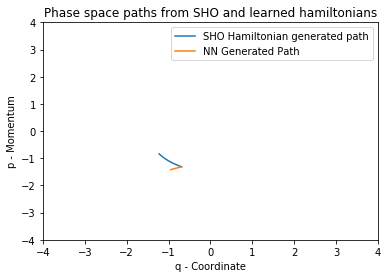

CurrentCost is: 10.013711220119115

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 9.483148551670686

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 9.136972093959743

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 8.144137696742888

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 7.4270867580205495

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


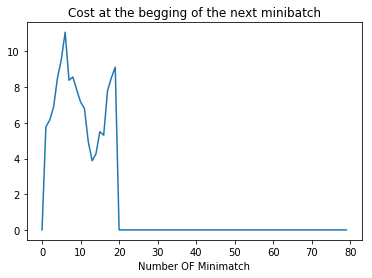

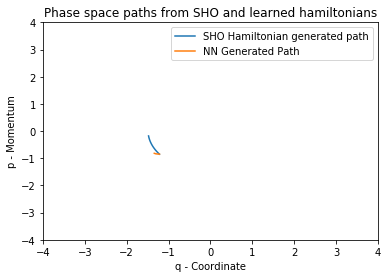

CurrentCost is: 6.237266869442833

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 6.130994598248317

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 5.955091967487009

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 5.556602352006829

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 5.193112753272096

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


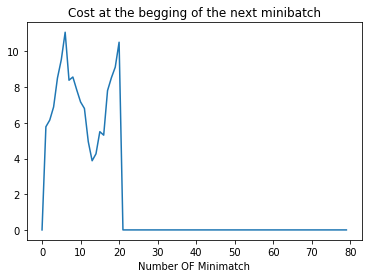

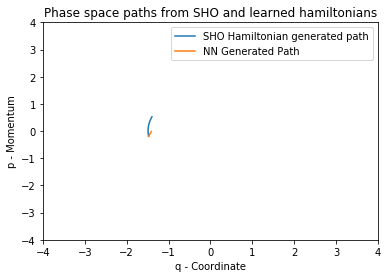

CurrentCost is: 3.6303148418897337

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 3.451265412469496

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.970679562230281

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.970679562230281

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.75407100038375

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


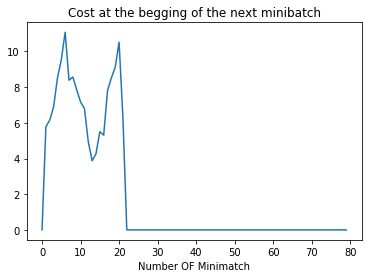

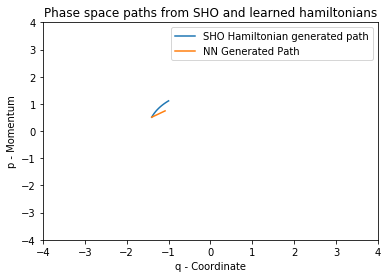

CurrentCost is: 2.0791307773647167

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.803153994903921

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.6258417032153532

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.3447522668011913

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.3447522668011913

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


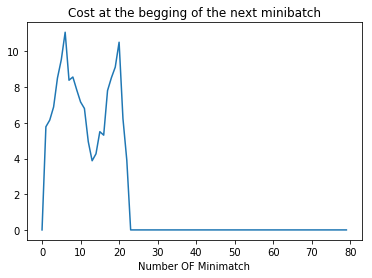

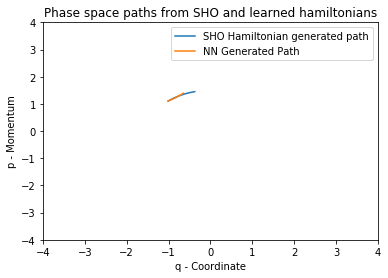

CurrentCost is: 4.106075729314058

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 3.957994614968591

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.7336069647271146

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 3.61103700124505

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 3.1198255038105693

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


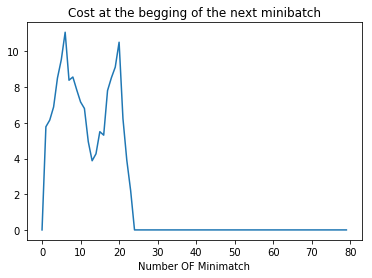

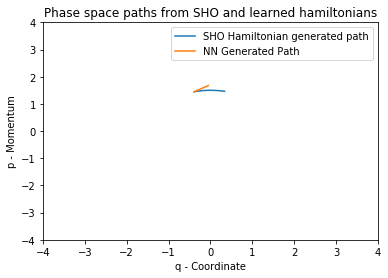

CurrentCost is: 4.863311685235074

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 4.329208558850947

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.5372446427221456

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.813280989556636

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.593702543667063

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


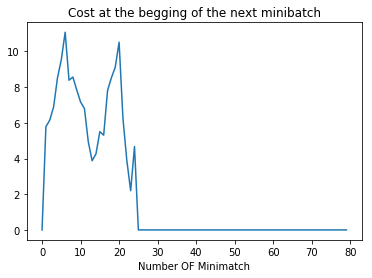

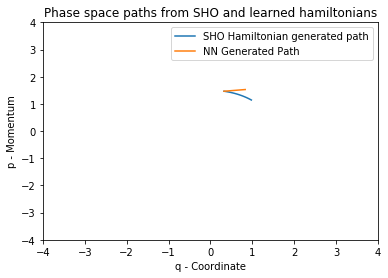

CurrentCost is: 5.963647321896233

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 5.379619136702811

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 4.635811190239855

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 4.247978296690151

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 3.390098454988815

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


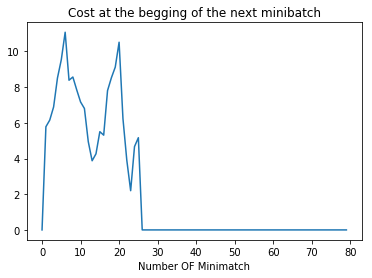

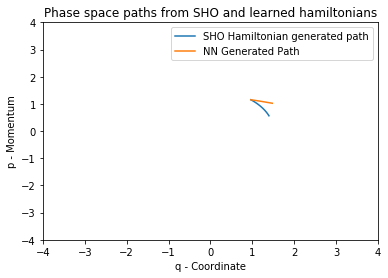

CurrentCost is: 2.7705611572974265

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.1248416666810908

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.5392694828603821

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.2093579644459747

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.9120614019493327

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


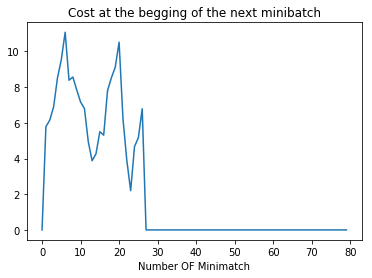

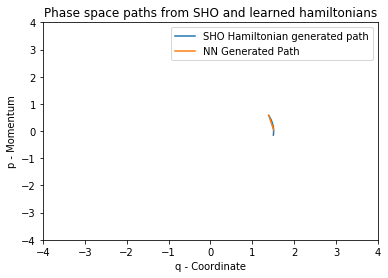

CurrentCost is: 1.2641844546732732

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.9394756624490483

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.6574649280416062

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.31575212742828856

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.09886819049089055

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


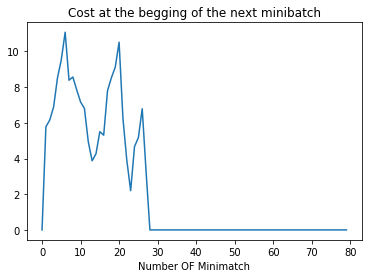

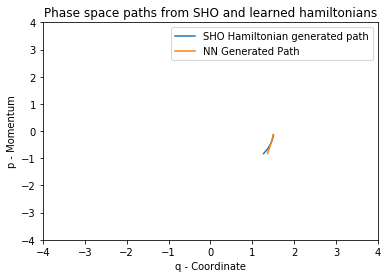

CurrentCost is: 2.29726378239256

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.9250467872983017

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.2153194094652993

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.8426635198697234

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.5868876545618504

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


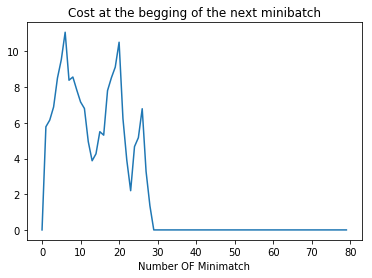

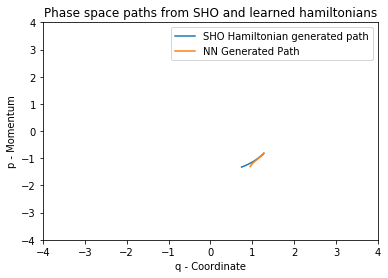

CurrentCost is: 3.8512213381858196

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.7677432586895283

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.3325733671923135

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.3357413411215644

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.0721220511065557

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


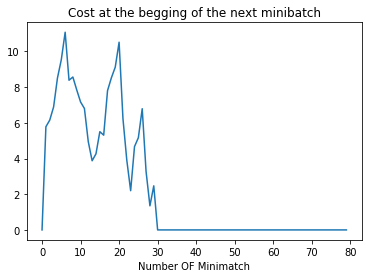

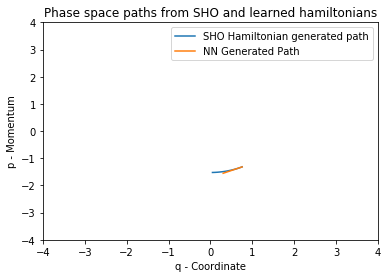

CurrentCost is: 2.037029507258416

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.8230579497662043

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.4187960841781995

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.9753982970994078

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.8389946590063182

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


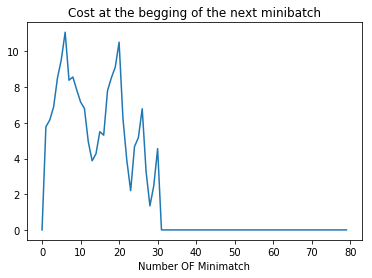

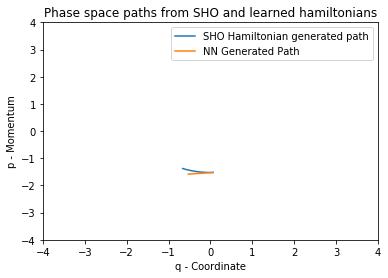

CurrentCost is: 3.18347389794016

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.852873936246648

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.692986812285137

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.523284328018549

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.000090605835723

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


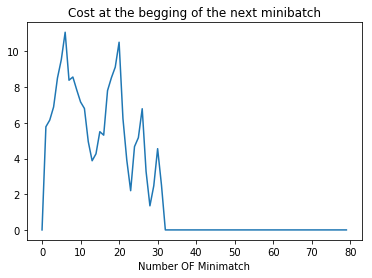

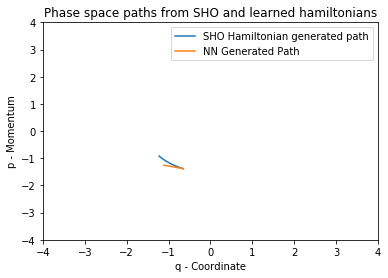

CurrentCost is: 4.698886587978916

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 4.3622953722995526

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.845259061469491

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 3.3919523410297217

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.7311364757930603

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


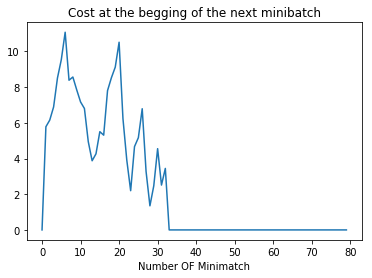

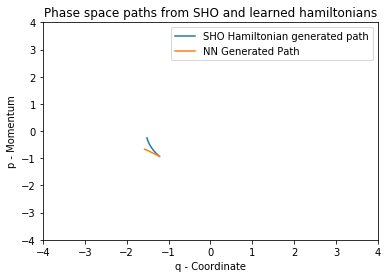

CurrentCost is: 3.520572476659462

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 3.3991791816065504

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.8959979449678146

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.4369142013425074

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.0285899812624915

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


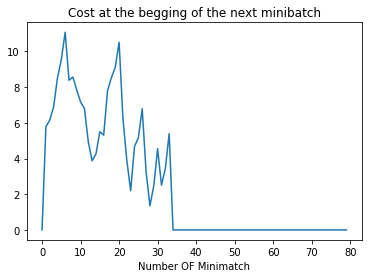

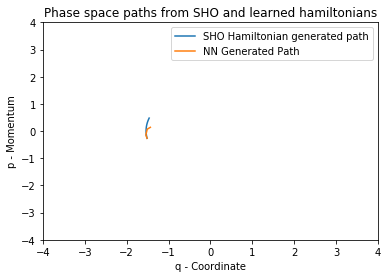

CurrentCost is: 1.211875321750695

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.0743329918908182

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.8108402203739422

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.7130812293305725

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.39454460499506205

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


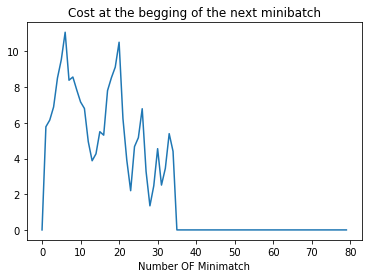

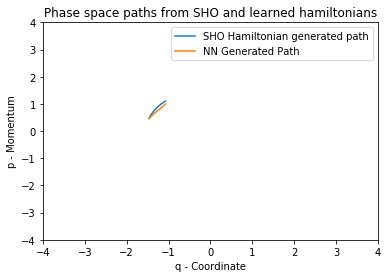

CurrentCost is: 1.6858403817893042

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.416427825280704

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.07671980192996

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.6014834269182631

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.41745357764231955

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


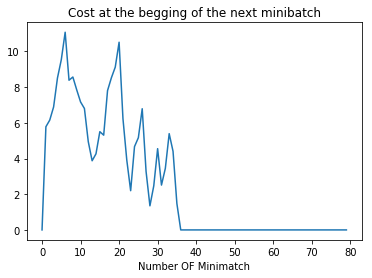

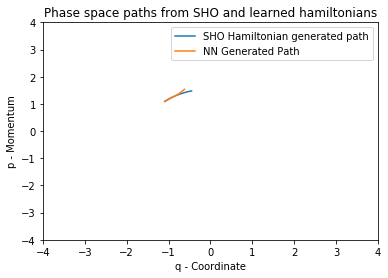

CurrentCost is: 6.145835927253652

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 6.130741367422581

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 5.429719615253885

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 4.334266209194642

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 3.4515611292992077

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


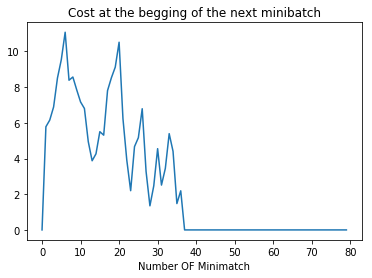

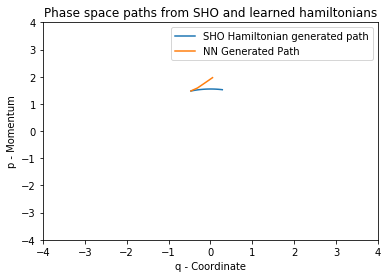

CurrentCost is: 5.857626703289539

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 4.534745913845745

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.2366764426409937

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.838344226117439

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.9438640340890556

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


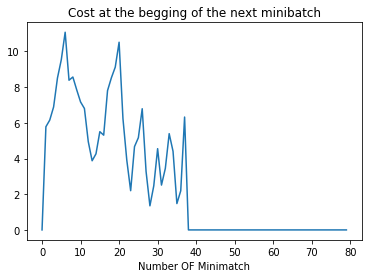

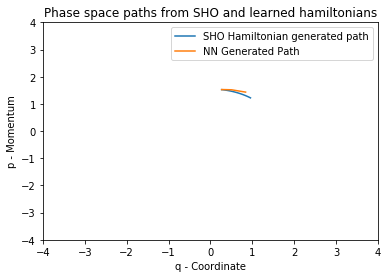

CurrentCost is: 0.6532819938543036

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.4137885888915046

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.16123089898691134

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.0892986593379907

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.03257349875059871

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


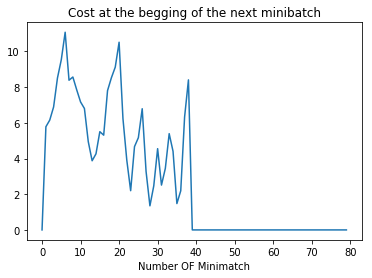

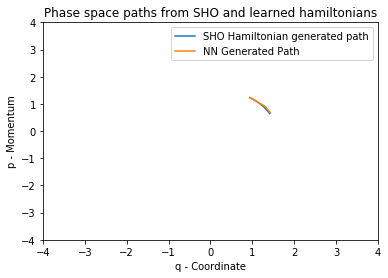

CurrentCost is: 0.39937631558505504

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.28414912989540136

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.13702290228900096

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.10670229969758781

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.03765016473177849

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


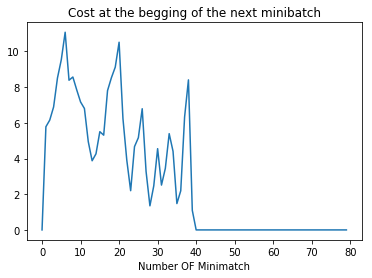

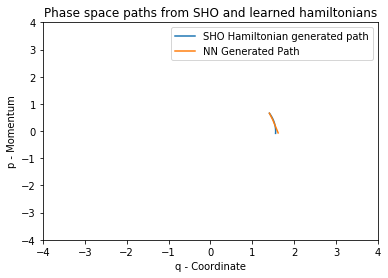

CurrentCost is: 1.0692987553702429

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.7321161587618481

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.3637690628741017

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.1381832688959086

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.03164864099079085

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


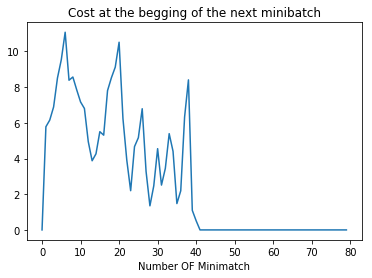

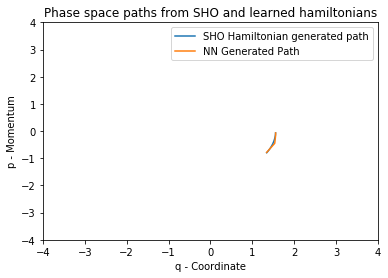

CurrentCost is: 0.07641995976255482

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.035696419114632685

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.02267050632923754

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.02267050632923754

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.007173607052221078

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


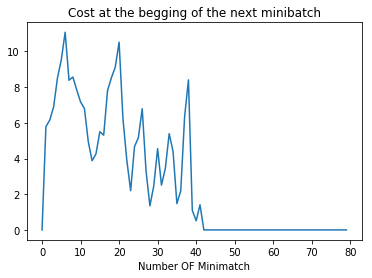

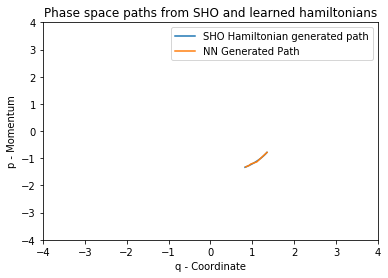

CurrentCost is: 0.21540134765132013

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.16482405656590884

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.04247405153331535

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.014735310705781447

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.011409293600034117

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


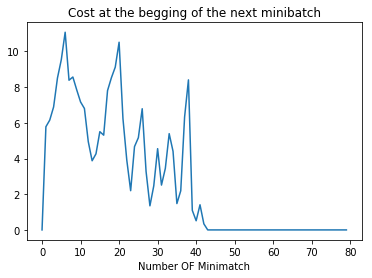

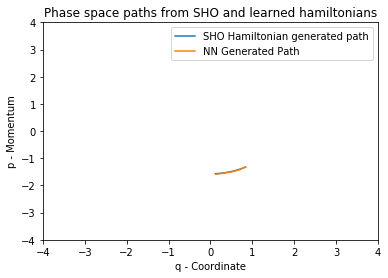

CurrentCost is: 0.797884398693194

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.5354115758072319

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.3192434490570541

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.132186154581311

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.09899385005715783

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


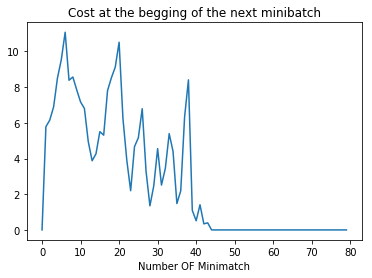

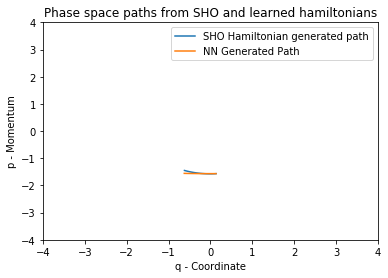

CurrentCost is: 2.0764098285098975

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.732582469940465

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.378777414396913

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.8367545406787172

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.4721231963473287

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


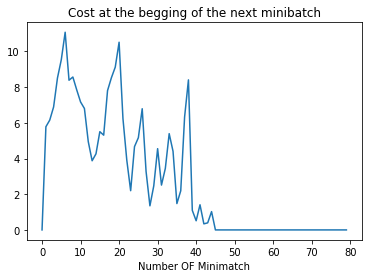

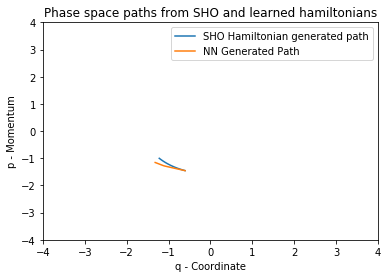

CurrentCost is: 2.0424426621935146

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.6960932179201798

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.5682120707364302

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.1783506269504342

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.0372088434981201

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


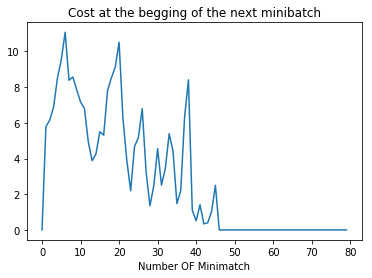

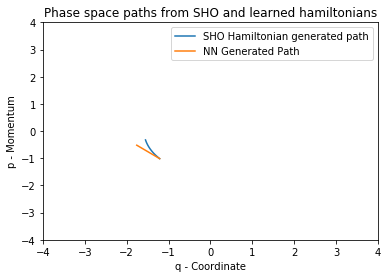

CurrentCost is: 0.6271234279808081

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.5054990334303218

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.2098865872752762

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.10249790735595857

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.040800796216530245

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


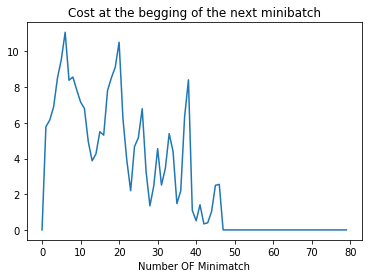

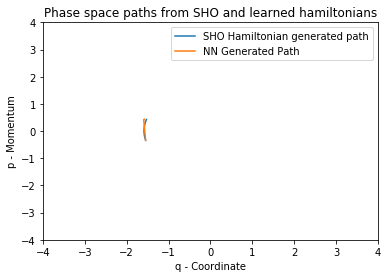

CurrentCost is: 0.42338680747982105

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.23645185710366434

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.23645185710366434

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.06342497437540598

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.06342497437540598

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


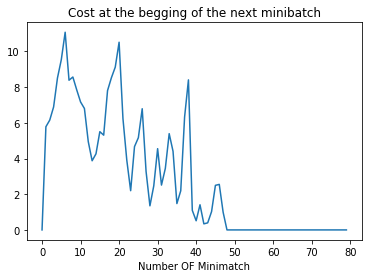

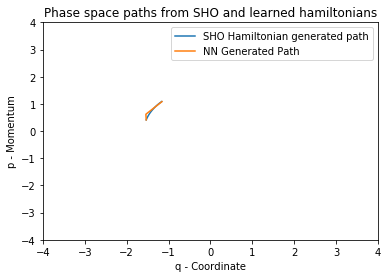

CurrentCost is: 0.3291567063455708

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.10127900645629909

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.08394160994757187

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.08394160994757187

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.0423756863417875

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


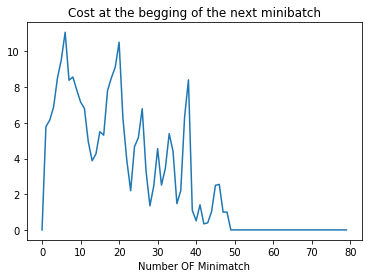

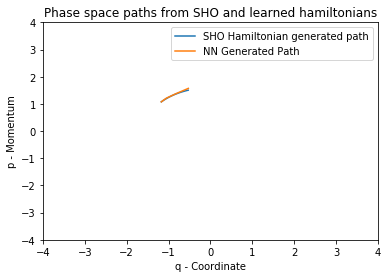

CurrentCost is: 1.2904156204658062

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.756644818438064

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.5865194195107845

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.226264726124243

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.14780997032922688

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


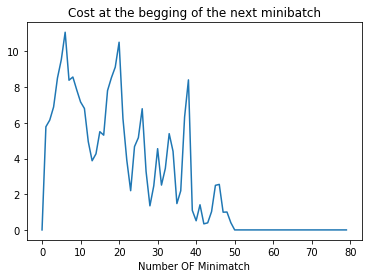

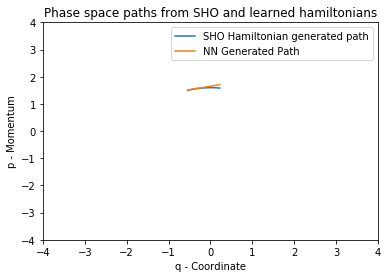

CurrentCost is: 1.6095479346957733

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.2748623016939082

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.7418535177609026

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.38347660782726295

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.2256233079770824

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


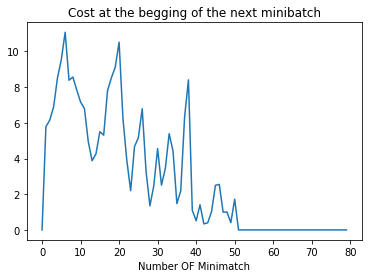

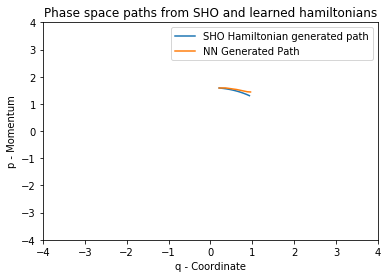

CurrentCost is: 1.8480576529188457

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.9446542383058786

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.3504142626115763

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.18711406542656783

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.01760524564262528

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


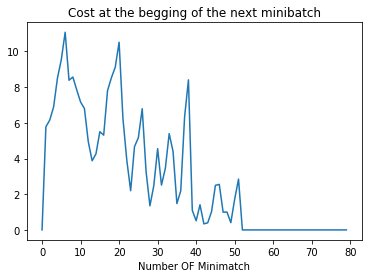

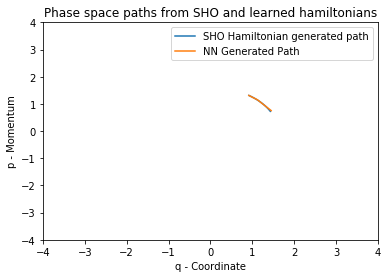

CurrentCost is: 0.1703713851751534

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.09315200826155715

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.018037117989849097

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.012201139312801958

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.012201139312801958

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


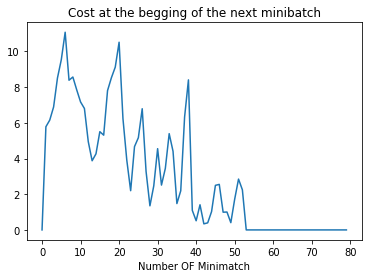

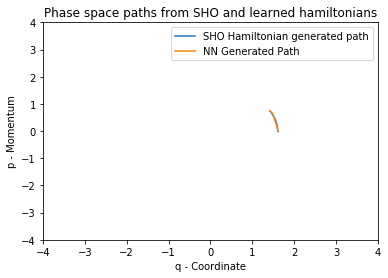

CurrentCost is: 0.782360668670723

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.3569874426444675

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.12326148773303684

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.022400392556582084

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.018564912640572643

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


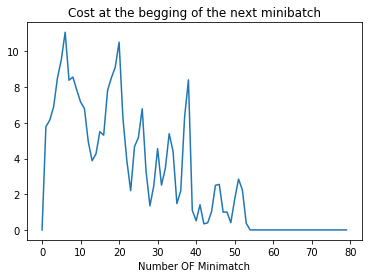

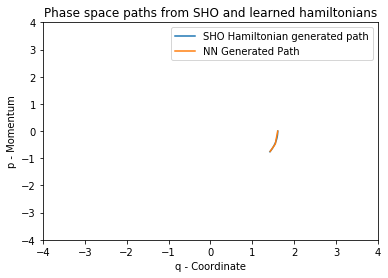

CurrentCost is: 0.2555730519024809

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.11362872707163436

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.1061074572446826

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.10098276058902383

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.06410535872580397

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


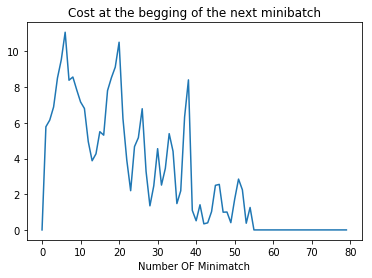

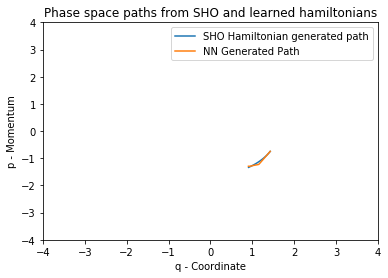

CurrentCost is: 4.4489041064377695

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 3.4152066062090505

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.6979069432156053

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.6560324089082545

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.0575838168753935

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


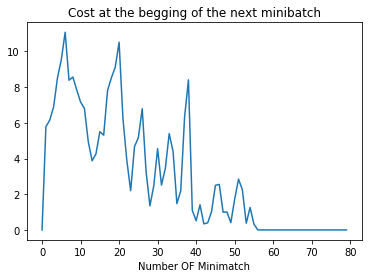

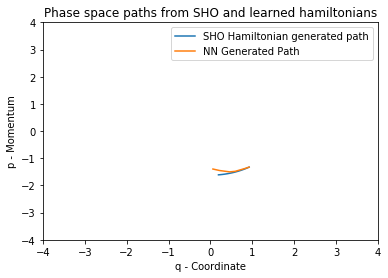

CurrentCost is: 0.7442486134884916

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.49064558870267116

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.15705614225246572

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.08082328045700762

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.05013051619031741

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


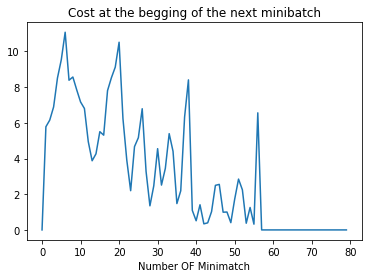

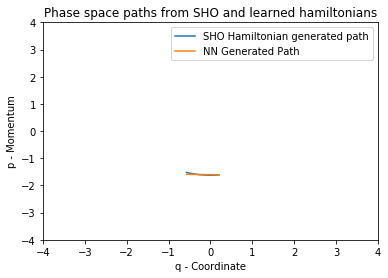

CurrentCost is: 1.4689901629601658

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.0069080884958073

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.6866017032459742

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.25480860074371503

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.07432698062680626

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


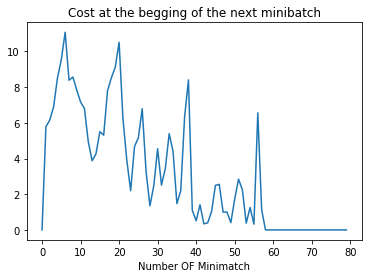

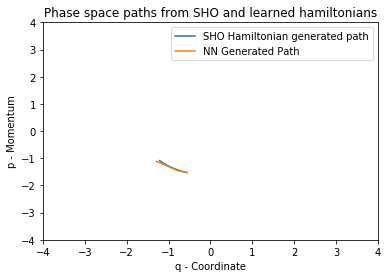

CurrentCost is: 1.4001619995722256

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.1564298126581865

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.834903299678182

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.5609769389836291

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.4136694084875806

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


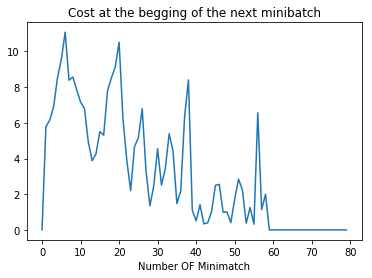

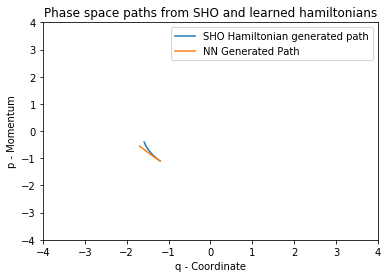

CurrentCost is: 2.5858315231125206

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.2932314894632255

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.0135990297863384

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.8789601232193398

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.479091937141576

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


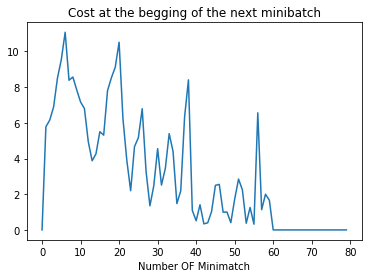

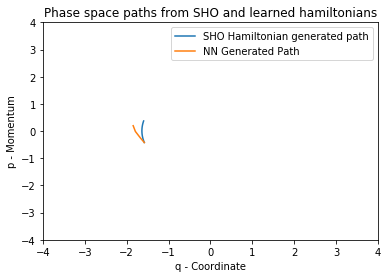

CurrentCost is: 1.24396013989654

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.9755416740613692

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.6587584453065394

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.5214749912215295

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.23962863277530652

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


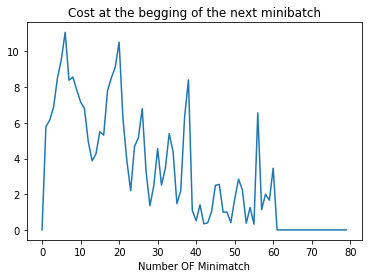

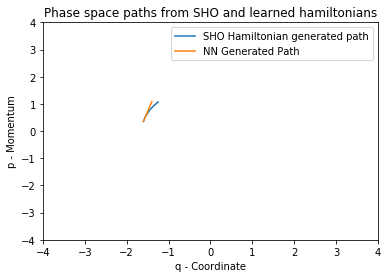

CurrentCost is: 0.36361110179825573

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.3337230067421569

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.18654671661828393

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.04337812880070206

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.022032046176274377

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


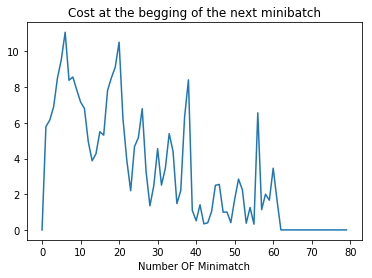

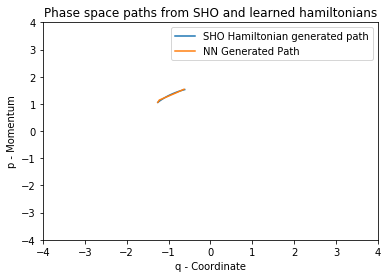

CurrentCost is: 1.1507706692256776

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.8693405717258621

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.6226358920171412

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.3132369288765942

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.20660821691365916

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


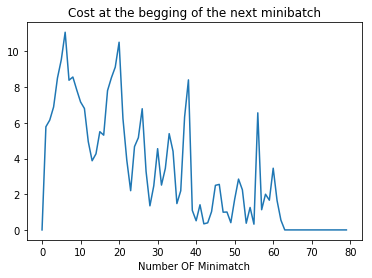

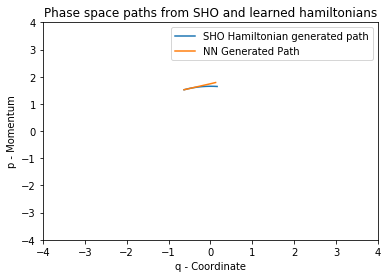

CurrentCost is: 4.011210927038688

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 3.0564556709137167

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.545781424450461

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.7919481661491592

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.61943866239878

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


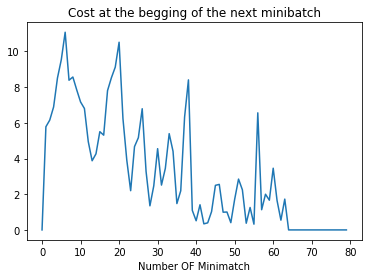

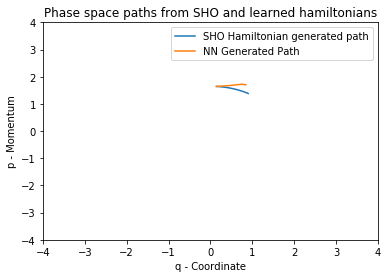

CurrentCost is: 1.3584289814778345

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.0191975660647867

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.9122529900762031

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.5809412099523832

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.2938928891541366

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


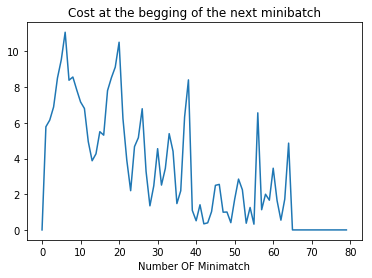

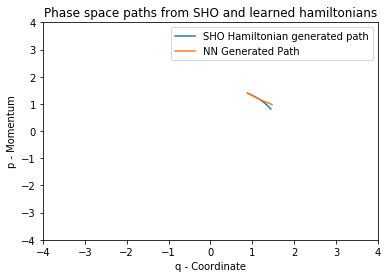

CurrentCost is: 0.8576862147278126

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.1248776248595059

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.08461263593402936

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.045014657610824946

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.012135334338063145

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


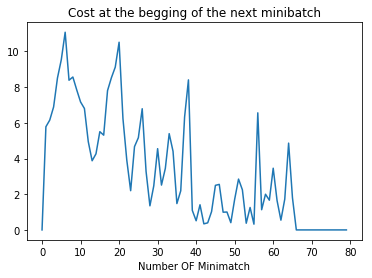

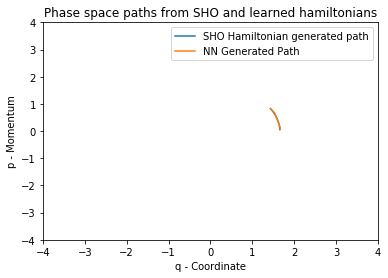

CurrentCost is: 0.056721633217466164

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.02833368516434586

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.026512944690387286

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.026512944690387286

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.026512944690387286

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


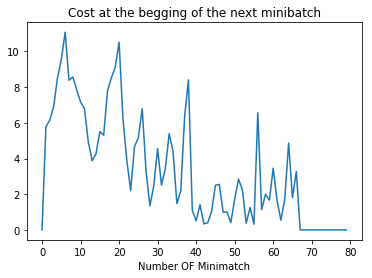

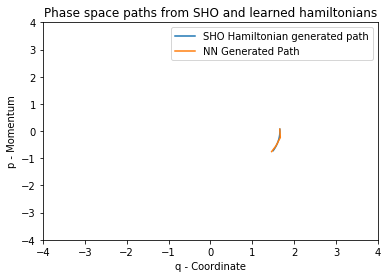

CurrentCost is: 0.48023816913640194

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.3505736293931512

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.2538082702497526

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.15931827282006256

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.058203204418323495

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


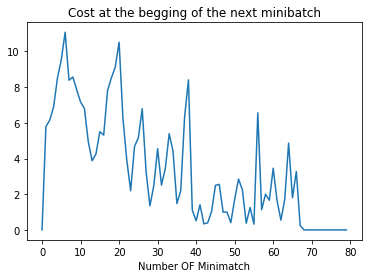

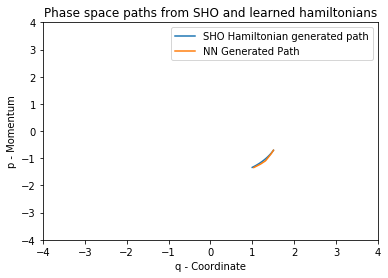

CurrentCost is: 0.20385852770451676

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.13720134134698367

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.02500366985895465

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.010413896235555027

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.010413896235555027

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


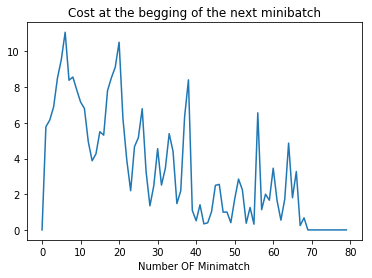

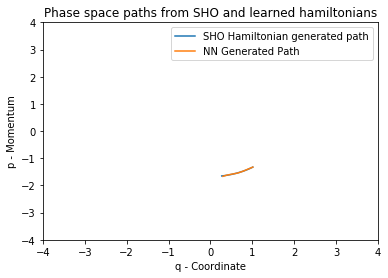

CurrentCost is: 1.0860467234317521

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.7692575605729437

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.6144509551515174

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.3382642982996223

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.1837341680594022

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


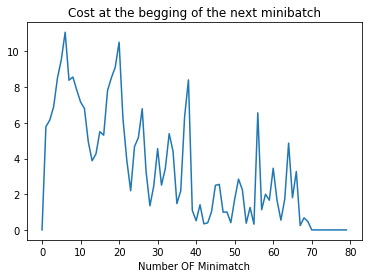

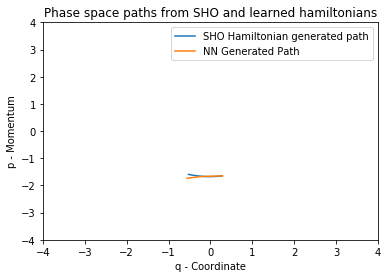

CurrentCost is: 6.488260492858293

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 4.705175874416803

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.5347913482945206

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.821940752281206

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.763106653353524

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


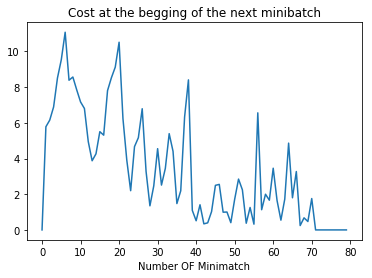

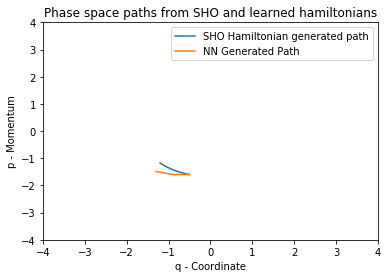

CurrentCost is: 9.87069456460106

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 6.415065717520991

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 4.94572015938887

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 3.1702841325352726

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 2.2930123112057044

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


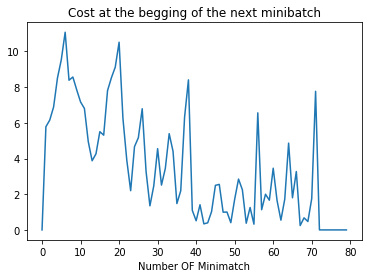

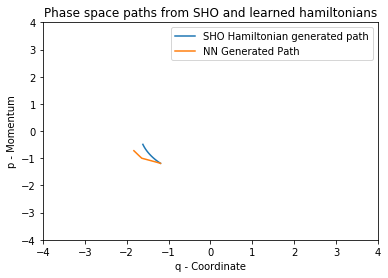

CurrentCost is: 2.2031308864082706

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.655349016545507

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.06681436453549

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.6799495111493508

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.4592693734160783

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


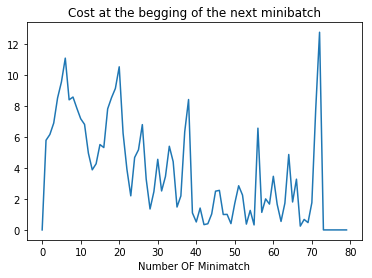

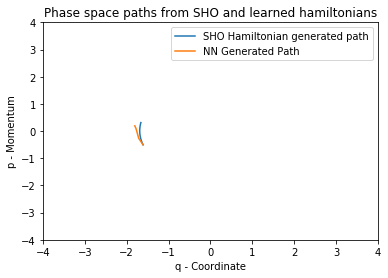

CurrentCost is: 1.827288959331831

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 1.4998200443029814

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 1.0384702821543859

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.0291077848372294

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.7394429318075071

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


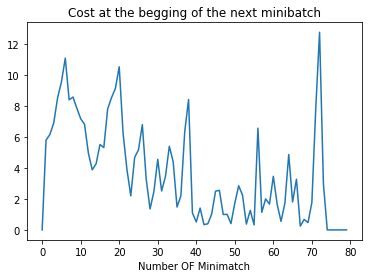

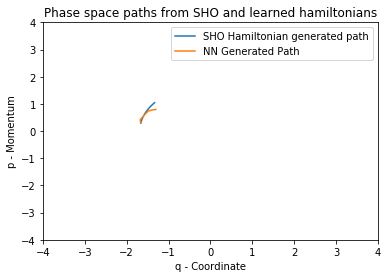

CurrentCost is: 3.3090834784849217

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 2.5295271418431002

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 2.272360862941753

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 1.6172803802163784

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.1671124144294143

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


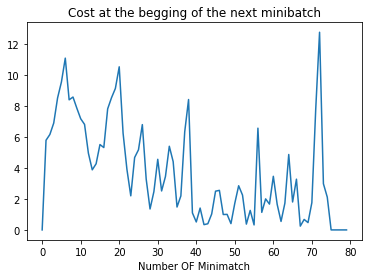

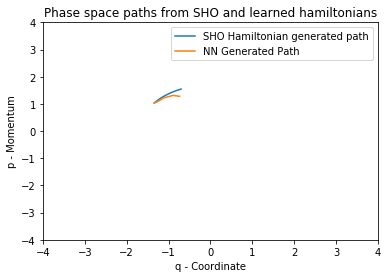

CurrentCost is: 5.6677634507042525

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 4.843064273845643

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 3.785460221947395

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 2.1518179696681643

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 1.381949038367028

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


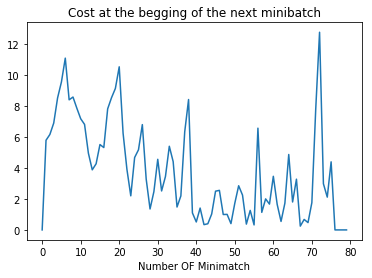

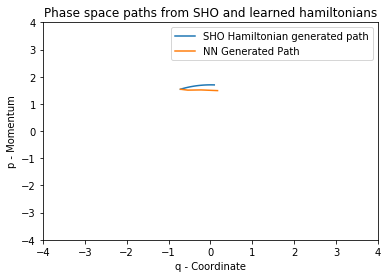

CurrentCost is: 0.4550929847216654

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.2180721311332905

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.055790461343199926

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.055790461343199926

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.047222065520345954

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


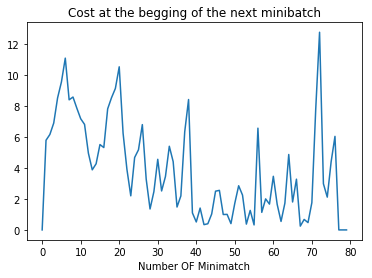

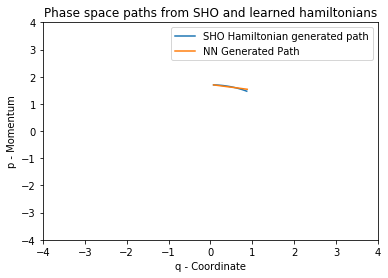

CurrentCost is: 0.23282888407606386

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.11902281324156566

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.03753330478196405

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.03753330478196405

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.03753330478196405

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


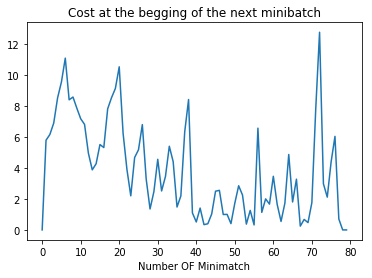

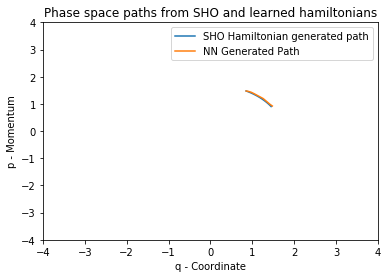

CurrentCost is: 1.191457952461066

Now Running Itteration 0 \ 5
the ImprovementItteration is: 2
CurrentCost is: 0.5724798721060453

Now Running Itteration 1 \ 5
the ImprovementItteration is: 3
CurrentCost is: 0.27189524706736695

Now Running Itteration 2 \ 5
the ImprovementItteration is: 4
CurrentCost is: 0.12727496640297334

Now Running Itteration 3 \ 5
the ImprovementItteration is: 5
CurrentCost is: 0.12727496640297334

Now Running Itteration 4 \ 5
the ImprovementItteration is: 6


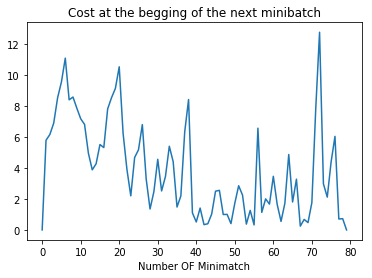

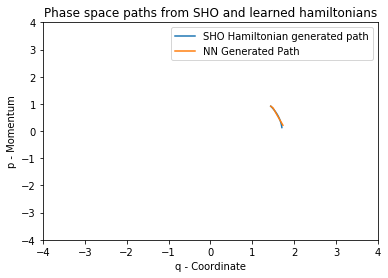

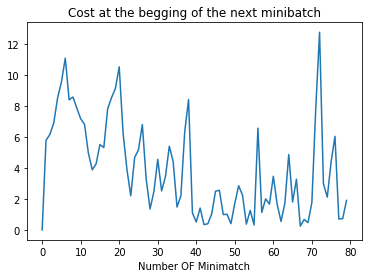

In [132]:
def Calculate_Loss_Function2(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted):
    Loss1 = np.sum((q_true - q_predicted)**2) + np.sum((p_true - p_predicted)**2)

    Scaling_Factor1 = np.mean(np.abs((q_true - q_predicted)/(dq_true - dq_predicted)))
    Scaling_Factor2 = np.mean(np.abs((p_true - p_predicted)/(dp_true - dp_predicted)))
#     Scaling_Factor1 = 1
#     Scaling_Factor2 = 1

    Loss2 = Scaling_Factor1*np.sum((dq_true - dq_predicted)**2) + Scaling_Factor2*np.sum((dp_true - dp_predicted)**2)

    Loss =  Loss2 + Loss1
    return Loss



## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Individuals_Parameter_Vector): 

        NumberOfSamples = Individuals_Parameter_Vector.shape[1]
        Cost_Function1 = np.zeros(NumberOfSamples)
        for i in range (0,NumberOfSamples):
#             q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,T_total)
#             q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)
            q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Individuals_Parameter_Vector[:,i],First_two_phase_space_samples,T_total)
    
            
            Cost_Function1[i] = Calculate_Loss_Function2(q_true, p_true, dq_true, dp_true, q_predicted, p_predicted, dq_predicted, dp_predicted)


        return Cost_Function1
    

def Prediction_for_State_Transitions(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    

    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    

def Calculate_NN_State_Transitions(Parameter_Vector,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total):


    
    
#     Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[0:35])
#     Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Parameter_Vector[35:70])


    Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
    Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)


    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])


    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):
#     for i in range(1,10):

        q_predicted[i] = q_true[i] + dq_predicted[i-1]
        p_predicted[i] = p_true[i] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Prediction_for_State_Transitions(Net1,Net2,np.array([q_true[i],p_true[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)
        
    return q_predicted, p_predicted, dq_predicted, dp_predicted



## Setting the hyperparameters for two mode
ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 0.5
RandomMultiplicationFactor =  0.1
SignificantChangeValue =10
Maximal_Random_Search = 0.3
NumberOfSamples = 10 ## This is the number of individuals in each itteration


Number_Of_Itterations =20
print_Cost = 1


x = 1
y = 1
# First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
First_two_phase_space_samples = np.array([[1,1.01],[1,0.98984507],[0,0.01]])
InitialParameters = np.random.rand(int(2*TotalParameters_in_5_layer_net),1)

T_total = 0.5
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
Cost1 = Cost_Function()


Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)



# q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)
    

plt.figure(0)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
plt.show()

Number_Of_Minibatches = 80
Cost_Tracking_Vector = np.zeros(Number_Of_Minibatches)
for i in range (1,Number_Of_Minibatches):

    
    Number_Of_Itterations =5
    T_total = 0.5
    
    
    N = q_true.shape[0]
    First_two_phase_space_samples = np.array([[q_true[N-2],q_true[N-1]],[p_true[N-2],p_true[N-1]],[0,0.01]])
    if Number_Of_Minibatches == 100:
        First_two_phase_space_samples = np.array([[1,1.01],[1,0.98984507],[0,0.01]])
    
    q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
    
    Cost_Tracking_Vector[i]    = Cost1.Cost_Function(Best_Individual)

    Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,Best_Individual,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)
#     q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

    q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)
    
    plt.figure(4)
    plt.plot(q_true,p_true)
    plt.plot(q_predicted,p_predicted)
    plt.title("Phase space paths from SHO and learned hamiltonians")
    plt.xlabel("q - Coordinate")
    plt.ylabel("p - Momentum")
    plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.show()

    
    plt.figure(5)
    plt.title("Cost at the begging of the next minibatch")
    plt.plot(Cost_Tracking_Vector)
    plt.xlabel("Cost")
    plt.xlabel("Number OF Minimatch")


In [134]:

Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

(86,)
(86,)
(172, 1)
(172, 1)


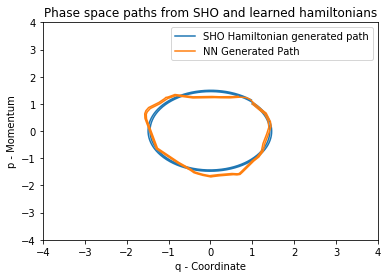

CurrentCost is: 78.7256466894643

Now Running Itteration 0 \ 10
the ImprovementItteration is: 2
CurrentCost is: 78.7256466894643

Now Running Itteration 1 \ 10
the ImprovementItteration is: 2
CurrentCost is: 78.7256466894643

Now Running Itteration 2 \ 10
the ImprovementItteration is: 3
CurrentCost is: 74.53318342292273

Now Running Itteration 3 \ 10
the ImprovementItteration is: 4
CurrentCost is: 74.53318342292273

Now Running Itteration 4 \ 10
the ImprovementItteration is: 2
CurrentCost is: 71.2839755931231

Now Running Itteration 5 \ 10
the ImprovementItteration is: 3
CurrentCost is: 71.2839755931231

Now Running Itteration 6 \ 10
the ImprovementItteration is: 2
CurrentCost is: 60.527344177773195

Now Running Itteration 7 \ 10
the ImprovementItteration is: 3
CurrentCost is: 60.527344177773195

Now Running Itteration 8 \ 10
the ImprovementItteration is: 2
CurrentCost is: 60.527344177773195

Now Running Itteration 9 \ 10
the ImprovementItteration is: 3


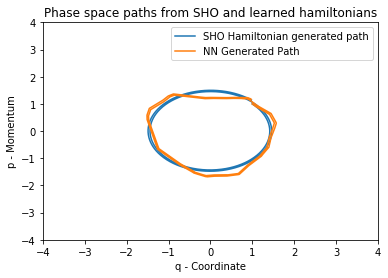

In [141]:
Best_Individual1 = Open_Parameters_Of_Network()
Best_Individual = Best_Individual1
T_total = 12.5
    
## Testing network on longer data
N = q_true.shape[0]
First_two_phase_space_samples = np.array([[1,1.01],[1,0.98984507],[0,0.01]])
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
# q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)

plt.figure(4)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()




ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 0.5
RandomMultiplicationFactor =  0.1
SignificantChangeValue =2
Maximal_Random_Search = 0.01
NumberOfSamples = 10 ## This is the number of individuals in each itteration



Number_Of_Itterations =10
  
N = q_true.shape[0]
# First_two_phase_space_samples = np.array([[q_true[N-2],q_true[N-1]],[p_true[N-2],p_true[N-1]],[0,0.01]])
First_two_phase_space_samples = np.array([[1,1.01],[1,0.98984507],[0,0.01]])
q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)


Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,Best_Individual,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)

q_predicted, p_predicted, dq_predicted, dp_predicted =Create_predicted_path2(Best_Individual,First_two_phase_space_samples,T_total)
# q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

plt.figure(4)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()




# Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

In [142]:

Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

In [46]:

def Save_to_CSV(Net1_Parameters,Net2_Parameters):
    
        ## Save the parameters of the network
#         Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"

        Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"

        with open(Name_Of_Parameter_File, 'w') as csvfile:
            fieldnames = ['Net1_Parameters','Net2_Parameters']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()

            for i in range(0,Net1_Parameters.shape[0]):
                writer.writerow({ 'Net1_Parameters':Net1_Parameters[i],   'Net2_Parameters':Net2_Parameters[i]})




def Load_Parameters_And_Indexes_Of_Specialist():
#     Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"
    Name_Of_Parameter_File = "Hamiltonian_Networks_Parameters.csv"
 
    ## Open Parameter array
    Parameters_Path = r"C:\Users\benjy\OneDrive\Brown\Fall 2018\PHYS 2030 - Classical Physics\Project\Files for the project" 
    Parameters_Path1 = Parameters_Path + "\\" + Name_Of_Parameter_File
    Parameters_temp = pandas.read_csv(Parameters_Path1)
    Parameters_Array = np.array(Parameters_temp)

    
    return Parameters_Array



In [200]:



# print(TotalParameters_in_5_layer_net)
# Parameter_Vector = np.random.rand(2*TotalParameters_in_5_layer_net)
# print(Parameter_Vector.shape)
# print(Parameter_Vector[0:TotalParameters_in_5_layer_net].shape)


Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

(548, 1)
548


C:\Users\benjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: ComplexWarning: Casting complex values to real discards the imaginary part


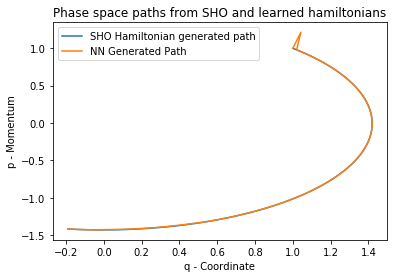

In [121]:
def Open_Parameters_Of_Network():
    Best_Individual1 = Load_Parameters_And_Indexes_Of_Specialist()
    A = Best_Individual1[:,0]
    B = Best_Individual1[:,1]
    print(A.shape)
    print(B.shape)

    Temp = np.concatenate([Best_Individual1[:,0],Best_Individual1[:,1]],axis = 0)
    print(np.array([Temp]).T.shape)

    Best_Individual1 = np.array([Temp]).T


    print(Best_Individual1.shape)
    Parameter_Vector1 = np.zeros(Best_Individual1.shape)

    for i in range(Best_Individual1.shape[0]):
        a = Best_Individual1[i,0]
        Parameter_Vector1[i] = float(a[1:6])


    Best_Individual1 = Parameter_Vector1

    return Best_Individual1


q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual1,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)



plt.figure(3)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])



In [22]:
def Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    

    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    
    
    
def Create_predicted_path2(Parameter_Vector,First_two_phase_space_samples,T_total):

    # Individuals_Parameter_Vector = np.random.rand(70)
    Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
    Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)

    # Individuals_Parameter_Vector = np.random.rand(70)
    # Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    # Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[35:70])

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    # dq = 0.1 ## this should be q[i] - q[i-1]
    # dp = 0.1 ## this should be p[i] - q[i-1]
    # dt = 0.1 ## this should be t[i] - t[i-1]

    # T_total = 10
    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])

    # dq_predicted, dp_predicted = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_predicted[i] = q_predicted[i-1] + dq_predicted[i-1]
        p_predicted[i] = p_predicted[i-1] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Create_Predictions_for_paths2(Net1,Net2,np.array([q_predicted[i],p_predicted[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)

    return q_predicted, p_predicted, dq_predicted, dp_predicted

In [261]:
q_true, p_true
N = q_true.shape[0]
print(N)
print(q_true[N-2],q_true[N-1])

100
-1.8227262218393177 -1.8088382485905183


(array([-2.15811612, -2.16194416, -2.16606121, -2.17017826, -2.17429531,
        -2.17841236, -2.18252941, -2.18664646, -2.19076351, -2.19488056,
        -2.19899762, -2.20311467, -2.20723172, -2.21134877, -2.21546582,
        -2.21958287, -2.22369992, -2.22781697, -2.23193402, -2.23605107,
        -2.24016813, -2.24428518, -2.24840223, -2.25251928, -2.25663633,
        -2.26075338, -2.26487043, -2.26898748, -2.27310453, -2.27722159,
        -2.28133864, -2.28545569, -2.28957274, -2.29368979, -2.29780684,
        -2.30192389, -2.30604094, -2.31015799, -2.31427504, -2.3183921 ,
        -2.32250915, -2.3266262 , -2.33074325, -2.3348603 , -2.33897735,
        -2.3430944 , -2.34721145, -2.3513285 , -2.35544556, -2.35956261,
        -2.36367966, -2.36779671, -2.37191376, -2.37603081, -2.38014786,
        -2.38426491, -2.38838196, -2.39249901, -2.39661607, -2.40073312,
        -2.40485017, -2.40896722, -2.41308427, -2.41720132, -2.42131837,
        -2.42543542, -2.42955247, -2.43366953, -2.4

In [305]:
print(int(1.3))

1
